In [1]:
import numpy as np
x_train = np.load('q1xTrain.npy').reshape(-1,1)
y_train = np.load('q1yTrain.npy').reshape(-1,1)
x_test = np.load('q1xTest.npy').reshape(-1,1)
y_test = np.load('q1yTest.npy').reshape(-1,1)

In [2]:
def poly(data, degree):
    data = np.repeat(data, degree+1, axis=1)
    data = np.power(data, np.arange(degree+1))
    return data

In [4]:
def gd(x, theta, y, alpha, error = 0):
    loss = np.dot(x,theta)-y
    gradient = alpha * np.dot(x.T,loss)
    if error == 0:
        return (theta - gradient), np.sum(loss ** 2)
    else:
        return np.sum(loss ** 2)

def error(x, y, theta):
    return 0.5 * np.sum((np.dot(x,theta)-y) ** 2)

def mse(x,y,theta):
    return np.sum((np.dot(x,theta)-y) ** 2) / x.shape[0]

def rmse(x,y,theta):
    return np.sqrt(2 * error(x,y,theta) / x.shape[0])



In [5]:
def bgd(x, y, degree, alpha, num_iter):
    n = x.shape[0]
    x = poly(x, degree)
    theta = np.zeros((degree+1, 1))
    i = 0
    error_list = []
    while mse(x,y,theta) >= 0.2 and i <= num_iter:
        i += 1
        theta, e = gd(x, theta, y, alpha)
        error_list.append(e)
    print("number of iteration: # {}, final error {}".format(i, e))
    print("The final result for theta is ", theta)
    return error_list, theta
e,theta = bgd(x_train, y_train, 1, 0.001, 10000)

number of iteration: # 2824, final error 4.000014739757104
The final result for theta is  [[ 1.88033999]
 [-2.68963297]]


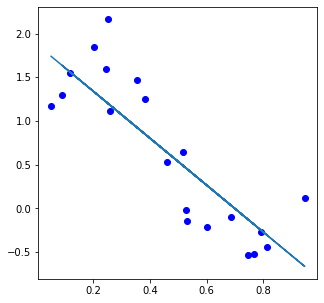

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize = (5,5), facecolor='white')
plt.scatter(x_train,y_train,c='b')
plt.plot(x_train, np.dot(poly(x_train, 1),theta))

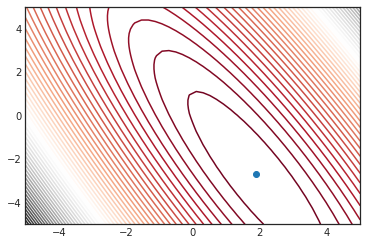

In [10]:
plt.style.use('seaborn-white')
x=np.linspace(-5,5,50).reshape(1,-1)
y=np.linspace(-5,5,50).reshape(1,-1)
X,Y=np.meshgrid(x,y)
M = np.zeros((X.shape[0],X.shape[1],2))
M[:,:,0]=X
M[:,:,1]=Y
ty1 = np.repeat(y_train.repeat(50, axis=1)[:, :, np.newaxis],50,2)
C = np.einsum('im,jkm',poly(x_train,1),M)-ty1
C1=C*C
C2=np.sum(C1,axis=0)
#Z=f(X,Y)
plt.contour(X,Y,C2,50,cmap='RdGy')
plt.scatter(theta[0],theta[1])

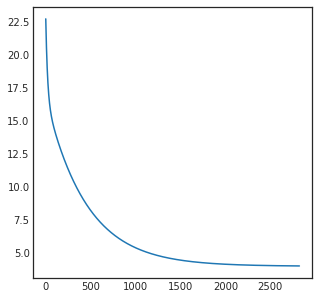

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize = (5,5), facecolor='white')
plt.plot(range(len(e)), e)

In [13]:
def sgd(x, y, degree, alpha, num_iter):
    n = x.shape[0]
    x = poly(x, degree)
    theta = np.zeros((degree+1, 1))
    j = 0
    error_list = []
    while mse(x,y,theta) >= 0.2 and j <= num_iter:
        j += 1
        error = 0
        for i in range(n):
            xi = x[i,:].reshape(1, -1)
            yi = y[i].reshape(1,1)
            theta, e = gd(xi, theta, yi, alpha)
            error = error + e
            if mse(x,y,theta) < 0.2:
                break
        error_list.append(error)
    print("number of iteration: # {}, final error {}".format(j, error))
    print("The final result for theta is ", theta)
    return error_list, theta

number of iteration: # 2820, final error 3.6844322593081404
The final result for theta is  [[ 1.88029847]
 [-2.68956969]]


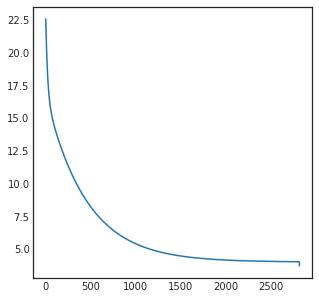

In [14]:
error_list, t = sgd(x_train, y_train, 1, 0.001, 10000)
plt.figure(figsize = (5,5), facecolor='white')
plt.plot(range(len(error_list)), error_list)

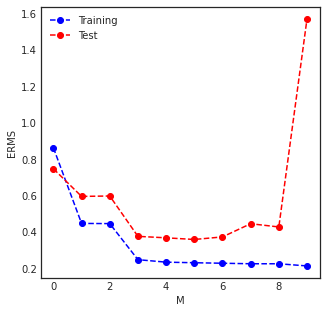

In [15]:
M = range(0, 10)
rmse_train = []
rmse_test = []
for i in M:
    trainx = poly(x_train, i)
    testx = poly(x_test, i)
    theta = np.dot(np.linalg.inv(np.dot(trainx.T,trainx)),trainx.T)
    theta = np.dot(theta,y_train)
    rmse_train.append(rmse(trainx,y_train,theta))
    rmse_test.append(rmse(testx,y_test,theta))
plt.figure(figsize = (5,5), facecolor='white')
plt.plot(M, rmse_train, '--o', color='blue', label='Training')
plt.plot(M, rmse_test, '--o', color='red', label='Test')
plt.legend()
plt.xlabel("M")
plt.ylabel("ERMS")
plt.show() 

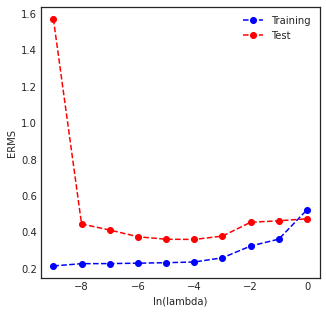

In [17]:
lambda_list = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1]
M = 9
rmse_train = []
rmse_test = []
trainx = poly(x_train, M)
testx = poly(x_test, M)
for l in lambda_list:
    theta = np.dot(np.linalg.inv((l * np.identity(trainx.shape[1])+np.dot(trainx.T,trainx))),trainx.T)
    theta = np.dot(theta,y_train)
    rmse_train.append(rmse(trainx,y_train,theta))
    rmse_test.append(rmse(testx,y_test,theta))
lambda_list[0] = 1e-9
plt.figure(figsize = (5,5), facecolor='white')
plt.plot(np.log10(lambda_list), rmse_train, '--o', color='blue', label='Training')
plt.plot(np.log10(lambda_list), rmse_test, '--o', color='red', label='Test')
plt.legend()
plt.xlabel("ln(lambda)")
plt.ylabel("ERMS")
plt.show() 

In [18]:
x = np.load('q2x.npy').reshape(-1,1)
y = np.load('q2y.npy').reshape(-1,1)
n = x.shape[0]
x = np.repeat(x, 2, axis=1)
x = np.power(x, np.arange(2))
theta = np.linalg.inv(np.dot(x.T, x)).dot(x.T).dot(y)
print(theta)

[[0.49073707]
 [0.26333931]]


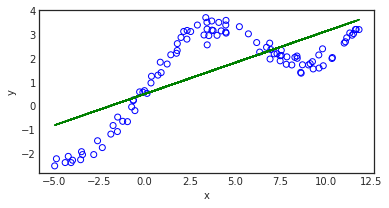

In [20]:
plt.figure(figsize=(6,3),facecolor='white')
plt.scatter(x[:,1], y, facecolors='none', edgecolors='blue')
plt.plot(x[:,1], x.dot(theta), color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

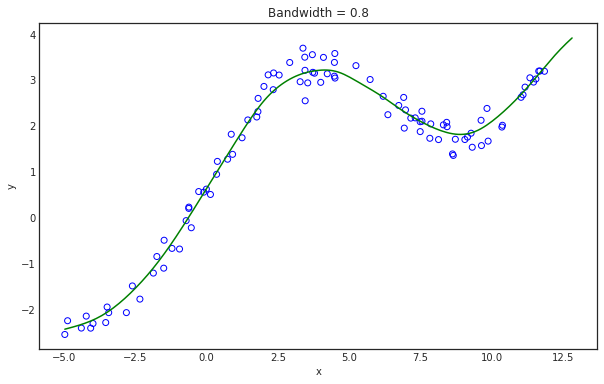

In [21]:
bandwidth = 0.8
def lwlr(x, y, bandwidth):
    x_list = np.arange(min(x[:,1]), max(x[:,1]) + 1, 0.1)
    prediction_list = []
    for k in range(len(x_list)):
        R = np.zeros((n, n))
        for i in range(n):
            center = x_list[k]
            R[i,i] = np.exp(-(center - x[i,1])**2/(2*bandwidth**2))
        theta = np.linalg.inv(x.T.dot(R).dot(x)).dot(x.T).dot(R).dot(y)
        prediction_list.append(theta[0] + theta[1]*x_list[k])
    plt.figure(figsize=(10,6),facecolor='white')
    plt.scatter(x[:,1], y, facecolors='none', edgecolors='blue')
    plt.plot(x_list, prediction_list, color='green')
    plt.title("Bandwidth = {}".format(bandwidth))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
lwlr(x, y, 0.8)

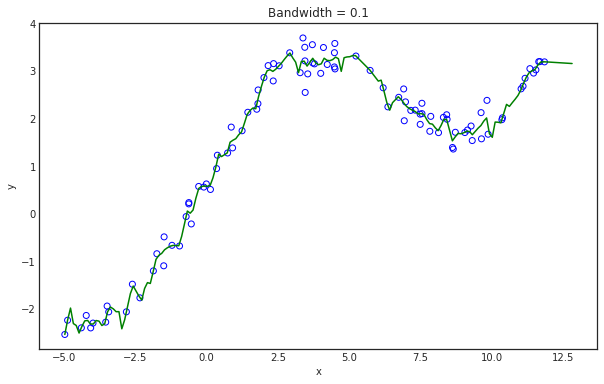

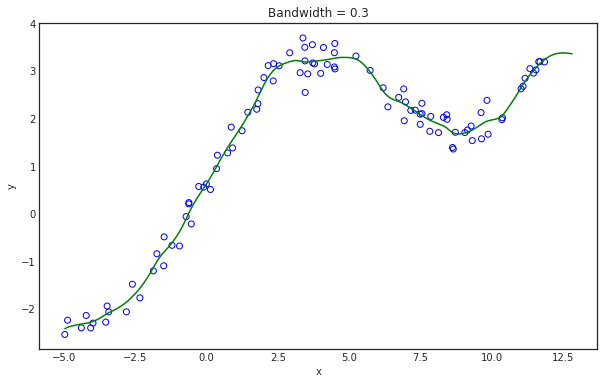

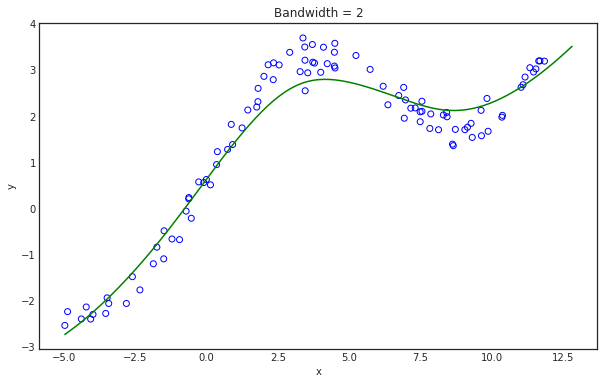

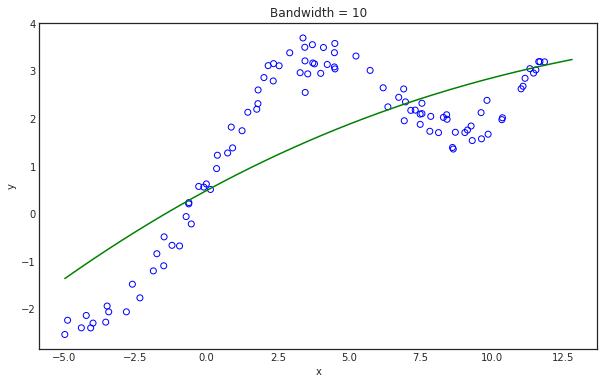

In [22]:
bandwidth_list = [.1,.3,2,10]
for i in bandwidth_list:
    lwlr(x, y, i)